<a href="https://colab.research.google.com/github/lucaspn017/quantitative_datas/blob/main/AcademicPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Códigos referência:

https://colab.research.google.com/drive/1YCreKvPRiunv19oDtSC-84i5rHkbeZ5h

https://colab.research.google.com/drive/1Z579R6eNn0fLGe2Aym_LM7gy_-OmpGoE#scrollTo=m47fyV-TskS8

# The dataset contains datas associating the performance of students with daily parameters as hour studied or sleep hours.

##**Objectives:**

> Defining the relationship between these variables, each one associated with the exam score.

> Defining a linear regression o predict the exam score with the attendance percent.

In [1]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("emanfatima2025/student-academic-performance-trends")

print("Path to dataset files:", path)

100%|██████████| 2.37k/2.37k [00:00<00:00, 3.90MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/emanfatima2025/student-academic-performance-trends/versions/1


In [2]:
academicPerf = pd.read_csv(path+'/student_exam_scores.csv')
academicPerf = pd.DataFrame(academicPerf)
academicPerf

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0


### Step 1: Data Cleaning

* In the data description at Kaggle, we have that it doesn´t has duplicated or null data. Although, i do this as a way of practice and turn this step more natural.

In [3]:
academicPerf.duplicated().sum()
academicPerf.isnull().sum()
academicPerf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


### Step 2: Obtain the relationship by dispersion graph between the exam score and other parameters.

### The observations are:

> ### The most linear relationship is given by hous studied.


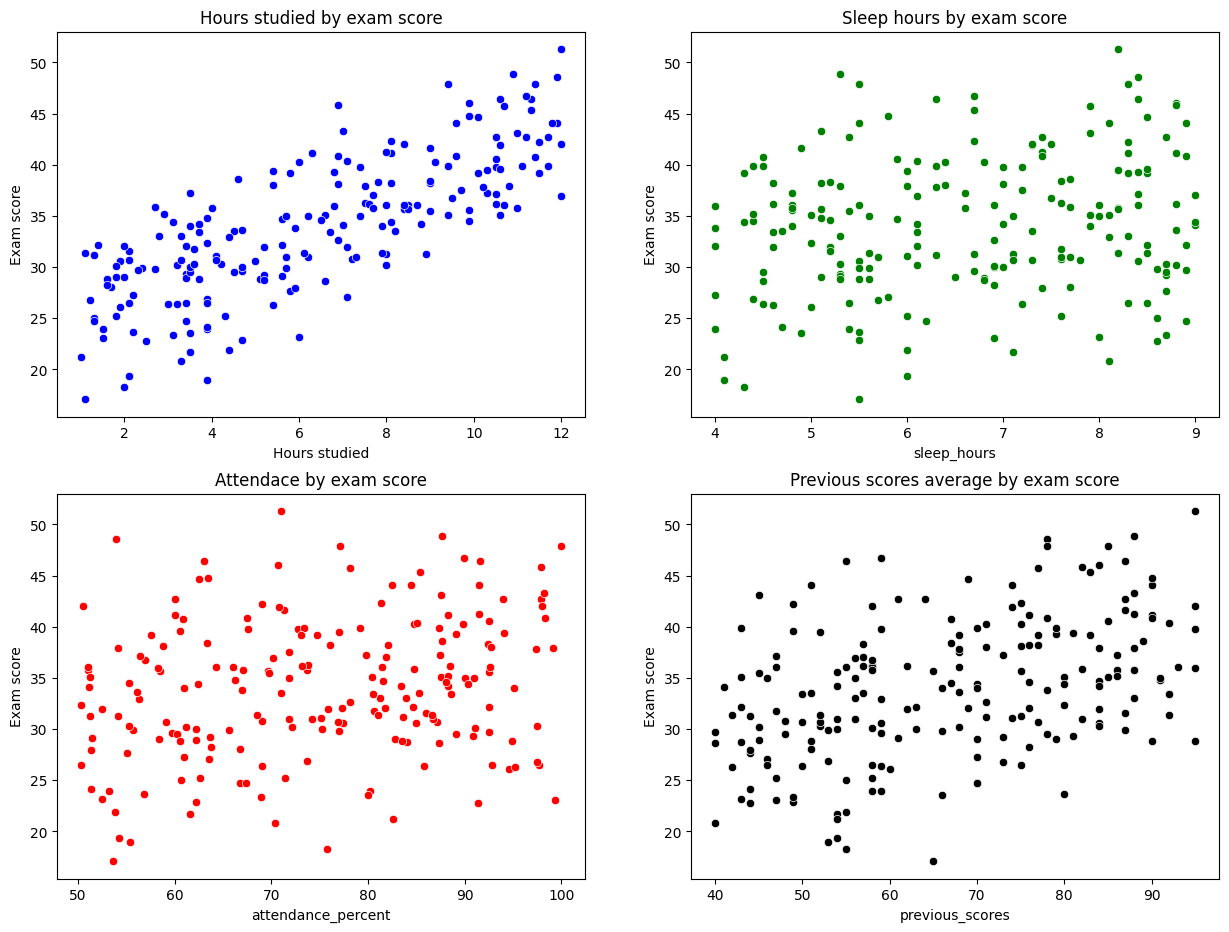

In [27]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,11))

sns.scatterplot(data=academicPerf, x='hours_studied', y='exam_score', ax=ax[0,0], color='Blue')
ax[0,0].set_title('Hours studied by exam score')
ax[0,0].set_xlabel('Hours studied')

sns.scatterplot(data=academicPerf, x='sleep_hours', y='exam_score', ax=ax[0,1], color='green')
ax[0,1].set_title('Sleep hours by exam score')

sns.scatterplot(data=academicPerf, x='attendance_percent', y='exam_score', ax=ax[1,0], color='red')
ax[1,0].set_title('Attendace by exam score')

sns.scatterplot(data=academicPerf, x='previous_scores', y='exam_score', ax=ax[1,1], color='black')
ax[1,1].set_title('Previous scores average by exam score')

for ax in ax.flat:
  ax.set_ylabel('Exam score')

plt.show()

In [ ]:
sns.pairplot(academicPerf)
plt.show()

In [6]:
import plotly.express as px
px.scatter(academicPerf, x='hours_studied', y='exam_score', trendline_color_override='red', trendline='ols')

### Step 3: Let's create two different linear regression models.
### **1. The first model will be built using a combination of two parameters from the dataset.**

### **2. In the second model, we will insert a constant as a variable and add more independent parameters to predict the exam score.**

* ### The observations are:
  1. R$^{2}$ : Brings the notion of how the dependent variable is `explained` by the independent. In the model that was builted, we obtained a `explained level of 0.604`, which is high, considering that the high `limit is 1`.

  2. The intercept is a metric that shows what the dependent parameter would be, if the independent variable were zero. In the case, we obtained `23.8` as exam score `without any hours studied`.

  3. Finally, the other important metric is the coeficient of hours studied. It brings the notion of `quantities that the exam score increase`, considering an `increment of one` in the hours studied. For our model, this metric was given by `1.6264`.

> The other relations have a quite progressive linear appearance, but with large outliers quantities.

In [7]:
from sklearn.model_selection import train_test_split

y= academicPerf['exam_score'] # variável dependente.
x= academicPerf.drop(columns = 'exam_score') #variável independente.

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=230)

academicPerfTrain = pd.DataFrame(xtrain)
academicPerfTrain['exam_score'] = ytrain

In [8]:
from statsmodels.formula.api import ols

model0 = ols('exam_score ~ hours_studied', data=academicPerfTrain).fit()

print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     210.6
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           1.48e-29
Time:                        11:45:48   Log-Likelihood:                -402.25
No. Observations:                 140   AIC:                             808.5
Df Residuals:                     138   BIC:                             814.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.8007      0.804     29.618

In [ ]:
from statsmodels.formula.api import ols

model1 = ols('exam_score ~ previous_scores', data= academicPerfTrain).fit()
model2 = ols('exam_score ~ sleep_hours', data= academicPerfTrain).fit()
model3 = ols('exam_score ~ attendance_percent', data= academicPerfTrain).fit()

print(model3.summary())

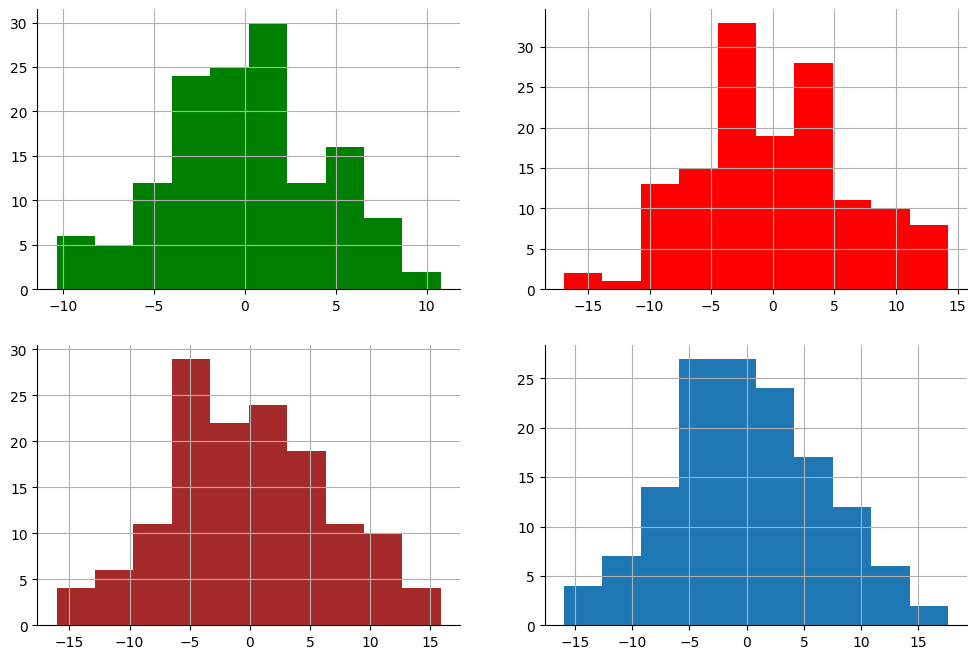

In [10]:
fig, ax = plt.subplots(ncols=2, nrows= 2, figsize=(12,8))
ax[0,0] = model0.resid.hist(ax=ax[0,0], color='green')
ax[0,1] = model1.resid.hist(ax=ax[0,1], color='red')
ax[1,0] = model2.resid.hist(ax=ax[1,0], color='brown')
ax[1,1] = model3.resid.hist(ax=ax[1,1])

sns.despine()

plt.show()

Adding more factors to the model

In [ ]:
import statsmodels.api as sm

xtrain = sm.add_constant(xtrain)

modelIncreased = sm.OLS(ytrain, xtrain[['const','previous_scores', 'sleep_hours', 'attendance_percent']]).fit()
modelIncreased2 = sm.OLS(ytrain, xtrain[['const', 'previous_scores','sleep_hours', 'attendance_percent', 'hours_studied']]).fit()

print(modelIncreased2.summary())

In [12]:
print('R² Modelo 1:', modelIncreased.rsquared)
print('R² Modelo 2:', modelIncreased2.rsquared)

R² Modelo 1: 0.28580072020193825
R² Modelo 2: 0.8345945917228401


In [13]:
newConditions = pd.DataFrame({'const':[1], 'previous_scores': [50], 'sleep_hours': [8], 'attendance_percent':[90], 'hours_studied':[12]})

predict0 = model0.predict(newConditions['hours_studied'])

print(predict0)

0    43.317822
dtype: float64


In [14]:
predict1 = modelIncreased2.predict(newConditions)[0]
print(predict1)

42.84020932933167


### Step 4: Analizing the model parameters to verify if:

> The´re presence of multicolinearity between the variables that were used.

* Was possible verify that there `isn´t multicolinearity biases`. What is indicated by a `vif` of 5 - 10 or beyond.

> Realize the prediction of the independent variables, to `verify the models accuracy` create with more independent variables.

* With this, we observe that the relationship between these predicted datas and the real datas following a `linear behavior`. Which means that the `parameters are too similar`.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

explanatories = ['const', 'previous_scores', 'sleep_hours', 'hours_studied']
explanatories2 = ['const', 'previous_scores','sleep_hours', 'attendance_percent', 'hours_studied']

In [16]:
vif1 = pd.DataFrame()

vif1['variable'] = explanatories
vif1['vif'] = [variance_inflation_factor(xtrain[explanatories], i) for i in range(len(explanatories))]

vif2 = pd.DataFrame()

vif2['explanatories'] = explanatories2
vif2['vif2'] = [variance_inflation_factor(xtrain[explanatories2],i) for i in range(len(explanatories2))]

vif2

,explanatories,vif2
0,const,77.132328
1,previous_scores,1.024673
2,sleep_hours,1.025680
3,attendance_percent,1.000900
4,hours_studied,1.006574


In [23]:
yPredicted = modelIncreased2.predict(xtrain[explanatories2])

fig = px.scatter( y= ytrain, x= yPredicted, title= 'Real datas x Predicted datas', labels={'x': 'Exam score predicted', 'y': 'Real exam score'})
fig.show()

# The increasing behavior of the data means that we do not have homoscedasticity in the variables.
# It means that we have inconsistent error variances.

### Step 5: Plot the relationship between the residuals and the predicted datas.

> When we verify the model relationship between the predicted values ​​and their residues, it´s possible to highlight that the points of dispersion graph following a `constant behavior around zero`. But, the distance related to zero for some points is a little bit large. Which means that some points have an `error of 4 or 3` beyond the real value.

In general, the model exhibits `homocedasticity`. It means:

The distribution of points is `uniform` and does not `show patterns or variations from one part to another`.

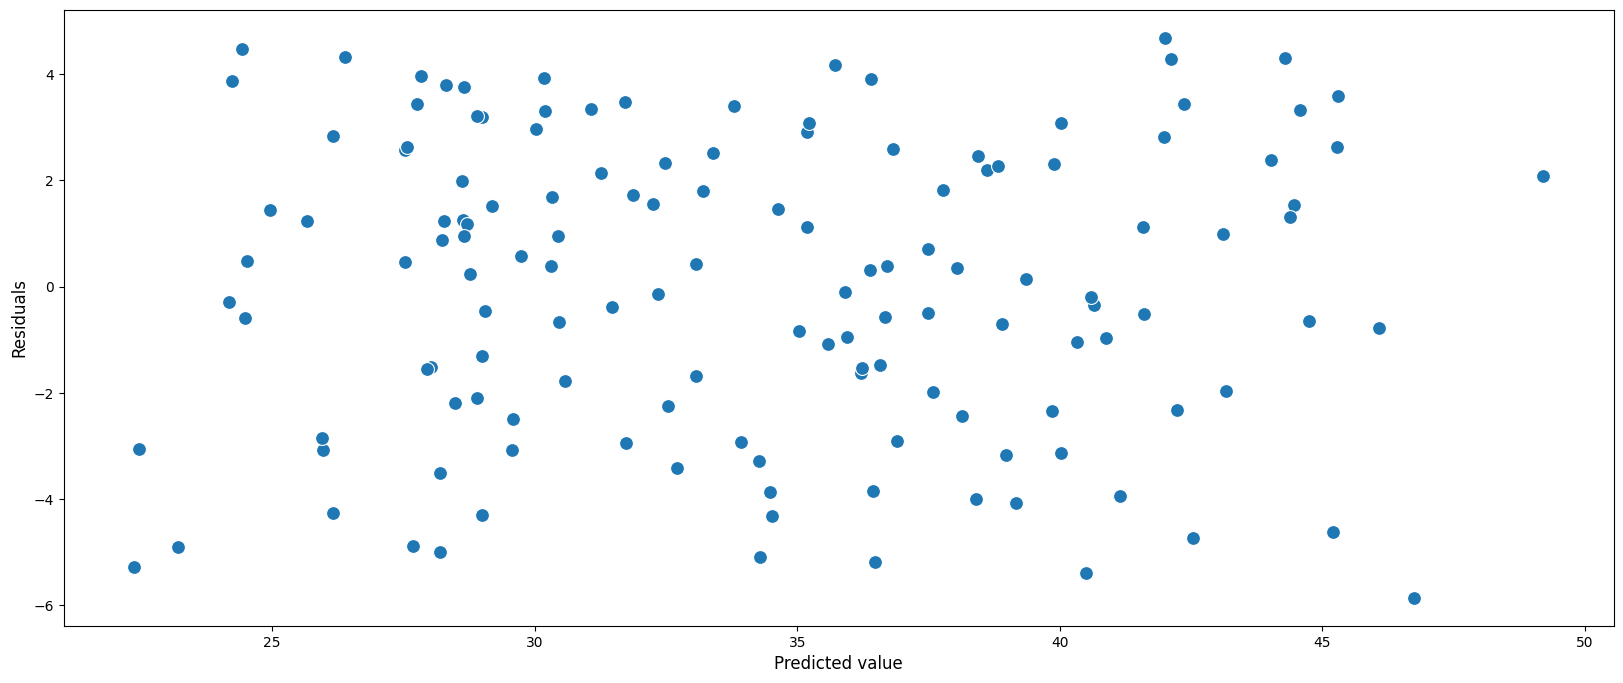

In [24]:
residuals = modelIncreased2.resid

ax = sns.scatterplot(x= yPredicted, y= residuals, s=100)
ax.figure.set_size_inches(20,8)
ax.set_xlabel('Predicted value', fontsize=12)
ax.set_ylabel('Residuals', fontsize=12)
ax
